Set the Spark Context

In [1]:
from pyspark import  SparkContext
sc = SparkContext( 'local', 'pyspark')

Import some libraries and get in a data table from Hive. Constructs a Spark DataFrame(s) from table(s) in Hive using the hive context. https://spark.apache.org/docs/1.3.1/sql-programming-guide.html

In [8]:
from pyspark.sql import HiveContext
from pyspark.mllib.clustering import KMeans
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.stat import Statistics
from math import sqrt
import matplotlib.pyplot as plt
from pylab import *

%matplotlib inline

hiveContext = HiveContext(sc)

# Constructs a Spark DataFrame (SDF) from the table in Hive.
hvt_SDF = hiveContext.sql('SELECT * FROM hvt')

hvt_operating_SDF= hiveContext.sql('SELECT * FROM hvt_operating')

hvt_failure_SDF = hiveContext.sql('SELECT * FROM hvt_failure')

print hvt_SDF.first()
print hvt_operating_SDF.first()
print hvt_failure_SDF.first()


Row(model=1, serial=0, inceptionperiod=1978, location=35, rating=1000, uprating=0, loadslope=0, modlevel=3, hightempdays=15, criticality=3, accessibility=100)
Row(model=1, serial=0, period=1978, rating=1000, loadfactor=1.00403, load=1004.03, damage=1.22069, maintenancescheduled=0, maintenanceperformed=0, hightempdays=13, externalremaininglife=98.7081, scheduledmaintenancecost=0)
Row(period=1964, serial=1520, model=1, repaircost=11447.252, totalcost=18947.252)


In [9]:
# Convert Spark DataFrame to Panda DataFrame (PDF)
hvt_PDF = hvt.toPandas()

# Create a Spark DataFrame from Pandas
spark_df = hiveContext.createDataFrame(hvt_PDF)


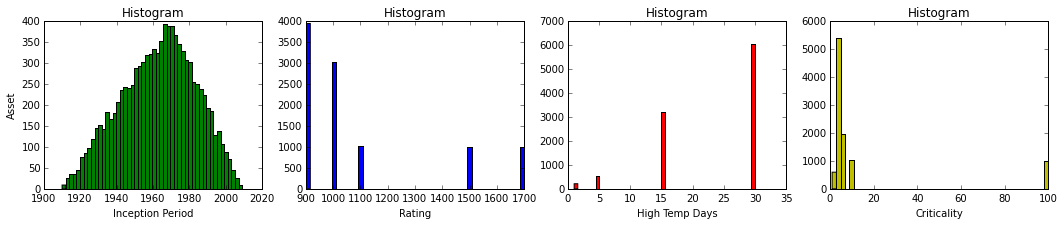

In [10]:
%matplotlib inline

x = hvt_PDF.inceptionperiod
y = hvt_PDF.rating
z = hvt_PDF.hightempdays
z1 = pandas_df.criticality
#fig = plt.figure()
fig, axes = plt.subplots(1, 4, figsize=(18,3))

axes[0].hist(x, 50, facecolor='g')
axes[0].set_xlabel('Inception Period')
axes[0].set_ylabel('Asset')
axes[0].set_title('Histogram');

axes[1].hist(y, 50, facecolor='b')
axes[1].set_xlabel('Rating')
#axes[1].set_ylabel('Asset')
axes[1].set_title('Histogram');

axes[2].hist(z, 50, facecolor='r')
axes[2].set_xlabel('High Temp Days')
#axes[2].set_ylabel('No. of Leaks')
axes[2].set_title('Histogram');

axes[3].hist(z1, 50, facecolor='y')
axes[3].set_xlabel('Criticality')
#axes[3].set_ylabel('No. of Leaks')
axes[3].set_title('Histogram');

From the above histogram we can say that the majority of the asset were installed somtime 1960-1980. The majority (70%) have a rating between 900-1000. Over 60% of these asset have been exposed to 30 high tempature days and 10% of these assets are in v important.

In [ ]:
# Convert Spark DataFrame to Pandas
hvt_operating_PDF = hvt_operating_SDF.toPandas()

# Create a Spark DataFrame from Pandas
spark_df = hiveContext.createDataFrame(hvt_operating_PDF)

In [ ]:
x = hvt_operating_PDF.loadfactor
y = hvt_operating_PDF.hightempdays
z = hvt_operating_PDF.externalremaininglife
z1 = hvt_operating_PDF.scheduledmaintenancecost

#fig = plt.figure()
fig, axes = plt.subplots(1, 4, figsize=(18,3))


axes[0].hist(x, 50, facecolor='b')
axes[0].set_xlabel('Load Factor')
#axes[1].set_ylabel('Asset')
axes[0].set_title('Histogram');

axes[1].hist(y, 50, facecolor='r')
axes[1].set_xlabel('High Temp Days')
#axes[1].set_ylabel('Asset')
axes[1].set_title('Histogram');

axes[2].hist(z, 50, facecolor='g')   
axes[2].set_xlabel('External Remaining life')
#axes[2].set_ylabel('No. of Leaks')
axes[2].set_title('Histogram');

axes[3].hist(z1, 50, facecolor='y')
axes[3].set_xlabel('Scheduled Maintenance Cost')
#axes[3].set_ylabel('No. of Leaks')
axes[3].set_title('Histogram');

$$ P = \frac{e^{\alpha+{\beta}x}}{1+e^{\alpha+{\beta}x}} $$

Logistic regression can in many ways be seen to be similar to ordinary regression. It models the relationship between a dependent and one or more independent variables, and allows us to look at the fit of the model as well as at the significance of the relationships (between dependent and independent variables) that we are modelling. However, the underlying principle of binomial logistic regression, and its statistical calculation, are quite different to ordinary linear regression. While ordinary regression uses ordinary least squares to find a best fitting line, and comes up with coefficients that predict the change in the dependent variable for one unit change in the independent variable, logistic regression estimates the probability of an event occurring (e.g. the probability of a pupil continuing in education post 16). What we want to predict from a knowledge of relevant independent variables is not a precise numerical value of a dependent variable, but rather the probability (p) that it is 1 (event occurring) rather than 0 (event not occurring). This means that, while in linear regression, the relationship between the dependent and the independent variables is linear, this assumption is not made in logistic regression. Instead, the logistic regression function is used.

This can be written as:
$$ P = \frac{e^{\alpha+{\beta}x}}{1+e^{\alpha+{\beta}x}} $$

where P is the probability of a 1, e is the base of the natural logarithm (about 2.718) and $$\alpha$$ and $$\beta$$ are the parameters of the model (as in normal linear regression). The value of $$\alpha$$ yields P when x is zero, and $$\beta$$ indicates how the probability of a 1 changes when x changes by a single unit. Because the relation between x and P is nonlinear, $$\beta$$ does not have as straightforward an interpretation in this model as it does in ordinary linear regression.

An important concept in logistic regression is that of odds ratios (see also Module 5 Unit 5 on log-linear modelling). Logistic regression, being based on the probability of an event occurring, allows us to calculate these, which are defined the ratio of the odds of an event occurring to it not occurring. If we look at our previous example, suppose, for example, that the probability of staying on in education post 16 is .8. Therefore p = .8. Then the probability of not staying on in education will be 1 - p = .2. 

The odds of staying on are then defined as
odds(staying on) = $$\frac{p}{q}= \frac{0.8}{0.2} = 4$$,
that is, the odds of staying on are 4 to 1 on. The odds of not staying on would be:
odds(not staying on) = $$\frac{q}{p} = \frac{0.2}{0.8} = 0.25$$
 = 1 to 4, or 4 to 1 against

Essentially, therefore, you can think of odds ratios as similar to betting odds. For example, the odds of different teams to win the English Premiership in 2008 at the moment of writing this (31 May 07) at one leading bookmaker are:

 Chelsea   11/8 
Manchester United   13/8 
Liverpool   9/2
Arsenal   7/1.
Odds rations are interpreted in the same way.

In logistic regression, the dependent variable is in fact a logit, which is a log of odds, being:
$$ logit (P) = \ln({\frac{P}{1-P})$$

As $$\frac{P}{1-P}=e^{\alpha+{\beta}x}$$, we can get back to our original logistic regression of:
$$ P = \frac{e^{\alpha+{\beta}x}}{1+e^{\alpha+{\beta}x}}$$

showing the relationship between the two, and how we get from odds ratios to probabilities and vice versa.

In [ ]:
# Build the model
model = LogisticRegressionWithLBFGS.train(parsedData)

# Evaluating the model on training data
labelsAndPreds = parsedData.map(lambda p: (p.label, model.predict(p.features)))
trainErr = labelsAndPreds.filter(lambda (v, p): v != p).count() / float(parsedData.count())
print("Training Error = " + str(trainErr))

Row(model=1, serial=0, inceptionperiod=1978, location=35, rating=1000, uprating=0, loadslope=0, modlevel=3, hightempdays=15, criticality=3, accessibility=100)
Row(model=1, serial=0, period=1978, rating=1000, loadfactor=1.00403, load=1004.03, damage=1.22069, maintenancescheduled=0, maintenanceperformed=0, hightempdays=13, externalremaininglife=98.7081, scheduledmaintenancecost=0)
Row(period=1964, serial=1520, model=1, repaircost=11447.252, totalcost=18947.252)

class PredictiveMaintenance(AbstractImperative):
    def __init__ (self,equipmentType):
        super(PredictiveMaintenance,self).__init__()
        self.equipmentType = equipmentType
        
        self.equipmentType.ratedMTBF = SuggestedInputVariable('RatedMTBF',self.equipmentType)
        
        self.addEntity(self.equipmentType)
        self.addEntity(MaintenanceTransaction('Maintenance',self.equipmentType))
        self.addEntity(Profile('Profile',self.equipmentType))
        
        self.entities['Profile'].operatingHours = SuggestedInputVariable('OperatingHours',self.entities['Profile'])
        self.entity = self.entities['Profile']
        
        
    def train(self):
        #tbd generalize
        self.entities[self.equipmentType.name].registerCol('IsTest')
        self.entity.joinMaster()
        isFail = 'IsFail'
        equipKey = self.equipmentType.getKeyCols()
        self.entities['Maintenance'].calcEventSummary(isFail,equipKey,targetEntity=self.entity)
        self.entity.aggregate(sourceCols=['DaysTo_IsFail','PeakLoad'] , aggregates=['mean','sum'] , targetEntity = self.entity, grainCols=['ModelNumber','SerialNumber'])
        self.healthModel = LogRegression(name='Health',target='IsFail',features = ['Age','DaysFrom_IsFail'])
        self.healthModel.train(self.entity)
        self.daysToFailModel = LinRegression(name='PredictedDaysToFail',target='DaysTo_IsFail',features=['DaysFrom_IsFail','Health','MeanTimeBetweenEvents_IsFail'])
        results = self.daysToFailModel.train(self.entity)
        return results

In [8]:
from pyspark.sql import HiveContext
from pyspark.mllib.clustering import KMeans
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.stat import Statistics
from math import sqrt
import matplotlib.pyplot as plt
from pylab import *
from pyspark.mllib.classification import LogisticRegressionWithSGD
from pyspark.mllib.regression import LabeledPoint
from numpy import array

%matplotlib inline

hiveContext = HiveContext(sc)

hvt_SDF = hiveContext.sql('SELECT model, serial, inceptionperiod FROM hvt')

#hvt_operating_SDF= hiveContext.sql('SELECT * FROM hvt_operating')

#hvt_failure_SDF = hiveContext.sql('SELECT * FROM hvt_failure')

In [9]:
hvt_SDF.first()

Row(model=1, serial=0, inceptionperiod=1978)

In [10]:
feature_matrix = hvt_SDF

In [11]:
feature_matrix_vectors = feature_matrix.map(lambda x: Vectors.dense(x)).cache()
feature_matrix_vectors.count()
feature_matrix_vectors.first()

DenseVector([1.0, 0.0, 1978.0])

In [13]:
# Build the model
parsedData = feature_matrix_vectors
model = LogisticRegressionWithLBFGS.train(parsedData)

# Evaluating the model on training data
labelsAndPreds = parsedData.map(lambda p: (p.label, model.predict(p.features)))
trainErr = labelsAndPreds.filter(lambda (v, p): v != p).count() / float(parsedData.count())
print("Training Error = " + str(trainErr))

NameError: name 'LogisticRegressionWithLBFGS' is not defined